<center> 
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Logo_Mondragon_Unibertsitatea.png" width="150" height="100" float ="left">


---
<h3>Jon Amelibia, Iker Cumplido, Aitor Hernandez, Daniel Puente and Iñigo Ugarte

## Index
---

- <a href='#1'><ins>1. Loading of Libraries and Data<ins></a>
- <a href='#2'><ins>2. EDA<ins></a>
- <a href='#3'><ins>3. Preprocessing<ins> </a>
- <a href='#4'><ins>4. Save data<ins> </a>

### <a id='1'>1. Loading of Libraries and Data</a>
---

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import glob
import re

import warnings
warnings.filterwarnings('ignore')

With this function we load the data in lists

In [2]:
def rutes(batery = 1): 
    cycles_path = glob.glob(path_origin + f'\Cell{batery}\*')
    dictionay_values = {x: int(re.findall(r'\d+',x.split('\\')[-1])[0] ) for x in cycles_path}
    final_rute = list(dict(sorted(dictionay_values.items(), key=lambda item: item[1])).keys())
    return dictionay_values, final_rute
def archives_(archive_num = 0, batery = 1): return glob.glob(rutes(batery)[1][archive_num]+ "\*.csv")
def csv_selector(csvv = 0, batery = 1): 
    values = [archives_(archive_num = x, batery = batery)[csvv] for x in range(len(rutes(batery = batery)[1]))  ]
    return [pd.read_csv(x, sep = ',') for x in values]

With the flowing function we can plot plots related to the comparison of change and discarge for all bateries

In [3]:
def plotting_results(names,  validation, test, x = [0, 1]):
    X_axis = np.arange(len(names))
    fig1, ax1 = plt.subplots(figsize = (27, 8))
    plt.bar(X_axis - 0.1, validation, 0.2, color = palette[0], label = 'Charge')
    plt.bar(X_axis + 0.1, test, 0.2, color = palette[5], label = 'Discharge')
    plt.ylim(x[0], x[1]), plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5, alpha = 0.5);
    plt.xlabel('Cells', fontdict=font), plt.ylabel('Charge values', fontdict=font),  plt.title(f'Porcentual difference from the first and last charge value', fontdict=font);
    for p in ax1.patches: plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=15)
    plt.legend(loc='upper right', fontsize=18, bbox_to_anchor=(1.12,1), borderaxespad=0);
    plt.show()

In [4]:
path_origin = "../data/original_data/"
palette = ['#264653','#2A9D8F','#85CAC2','#DFF6F4' ,'#E9C46A','#F4A261','#E76F51','#C53D1B', '#7E2711']
cells = [f'\Cell{x}\*' for x in range(1, 9)]
font = {'size': 16, 'color': 'black', 'weight': 'bold'}

Creation of **SoH** and **SoC** in the original data for later use.

In [5]:
elements  = os.listdir(path_origin)
for r in elements:
    
    path = path_origin + f'/{r}'
    dirs = sorted(os.listdir(path), key=lambda x: float(x[3:]))
    
    for i in dirs:
        path2 = path+'/'+i
        archives = [archive for archive in os.listdir(path2) if 'V' not in archive]
        cyc_discharge = pd.read_csv(path2 + f'/{archives[0]}')
        cyc_charge = pd.read_csv(path2 + f'/{archives[1]}')
        if i == 'cyc0': 
            initial_capacity = cyc_discharge.q.values[-1]

        SoH = (cyc_discharge.q.values[-1]/initial_capacity)*100
        cyc_discharge['SoH'], cyc_charge['SoH'] = SoH, SoH
        cyc_discharge['SoC'], cyc_charge['SoC'] = (cyc_discharge.q/cyc_discharge.q.values[-1])*100, (cyc_charge.q/cyc_charge.q.values[-1])*100

        cyc_discharge.to_csv(path_or_buf=path2+f'/{archives[0]}',index= False)
        cyc_charge.to_csv(path_or_buf=path2+f'/{archives[1]}',index= False)

### <a id='2'>2. EDA</a>
---

Load the data in lists

In [6]:
charge_every_cell, discharge_every_cell = [csv_selector(csvv = 0, batery = i) for i in range(1,9)], [csv_selector(csvv = 1, batery = i) for i in range(1,9)]

We load the first and last cycle from the first battery in order to obtain a quick visualization of the data.

In [7]:
cyc0ch, cyc0dc = charge_every_cell[0][0], discharge_every_cell[0][0]
cyc8200ch, cyc8200dc = charge_every_cell[0][-1], discharge_every_cell[0][-1]

#### **Plots 1 - Charge and discharge curves in cicle 0 vs cicle 8200**

We create the initial plots to see the behavior of the data.

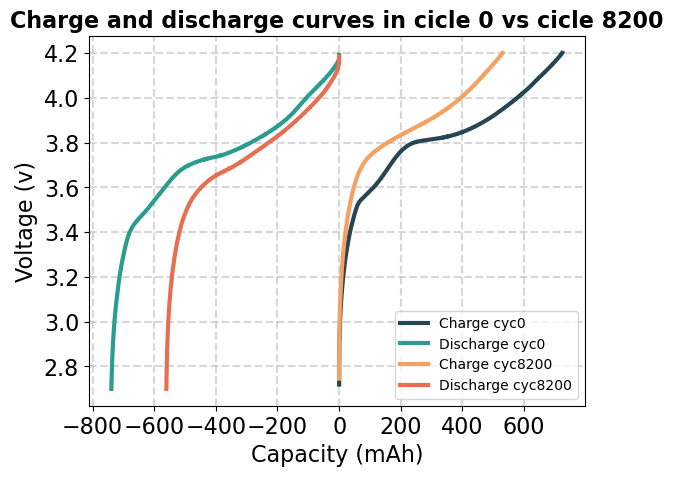

In [8]:
plt.plot(cyc0ch.q, cyc0ch.v, label='Charge cyc0', color=palette[0], linewidth=3)
plt.plot(cyc0dc.q, cyc0dc.v, label='Discharge cyc0', color=palette[1], linewidth=3)
plt.plot(cyc8200ch.q, cyc8200ch.v, label='Charge cyc8200', color=palette[5], linewidth=3)
plt.plot(cyc8200dc.q, cyc8200dc.v, label='Discharge cyc8200', color=palette[6], linewidth=3)
plt.legend(), plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5, alpha = 0.5);
plt.xlabel('Capacity (mAh)', fontsize=16), plt.ylabel('Voltage (v)', fontsize=16), plt.title('Charge and discharge curves in cicle 0 vs cicle 8200', fontsize=16, fontweight='bold');

In [9]:
print(f'The time of charge in cicle 0 is {cyc0ch.t.values[-1]-cyc0ch.t.values[0]} seconds.')
print(f'The time of discharge in cicle 0 is {cyc0dc.t.values[-1]-cyc0dc.t.values[0]} seconds.')
print(f'The time of charge in cicle 8200 is {cyc8200ch.t.values[-1]-cyc8200ch.t.values[0]} seconds.')
print(f'The time of discharge in cicle 8200 is {cyc8200dc.t.values[-1]-cyc8200dc.t.values[0]} seconds.')

The time of charge in cicle 0 is 0.04060957604087889 seconds.
The time of discharge in cicle 0 is 0.04173993202857673 seconds.
The time of charge in cicle 8200 is 0.029845685930922627 seconds.
The time of discharge in cicle 8200 is 0.03159782406874001 seconds.


#### **Plots 2 - Relation between time and SoC**

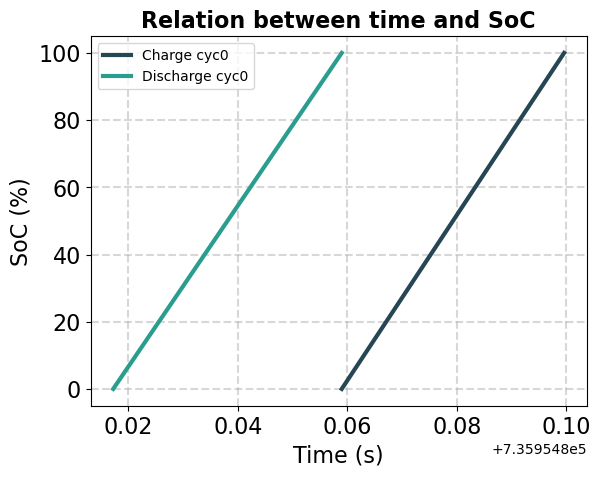

In [10]:
plt.plot(cyc0ch.t, cyc0ch.SoC, label='Charge cyc0', color=palette[0], linewidth=3)
plt.plot(cyc0dc.t, cyc0dc.SoC, label='Discharge cyc0', color=palette[1], linewidth=3)
plt.legend(), plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5, alpha = 0.5);
plt.xlabel('Time (s)', fontsize=16), plt.ylabel('SoC (%)', fontsize=16), plt.title('Relation between time and SoC', fontsize=16, fontweight='bold');

#### **Plots 3 - Porcentual difference from the first and last charge values for both discharge and charge process**

In [11]:
def begin_end_percent_difference(variable = 'q', types = 0):
    list_empty = []
    if types == 0: dff = charge_every_cell
    else: dff = discharge_every_cell
    for x in dff: 
        q_mean_list = [i[variable].mean() for i in x]
        list_empty += [q_mean_list[-1]/q_mean_list[0]]
    return list_empty

def begin_end_percent_without_difference(variable = 'q', types = 0):
    list_empty = []
    if types == 0: dff = charge_every_cell
    else: dff = discharge_every_cell
    for x in dff: list_empty += [x[-1][variable][len(x[-1])-1]/x[0][variable][len(x[0])-1]]
    return list_empty

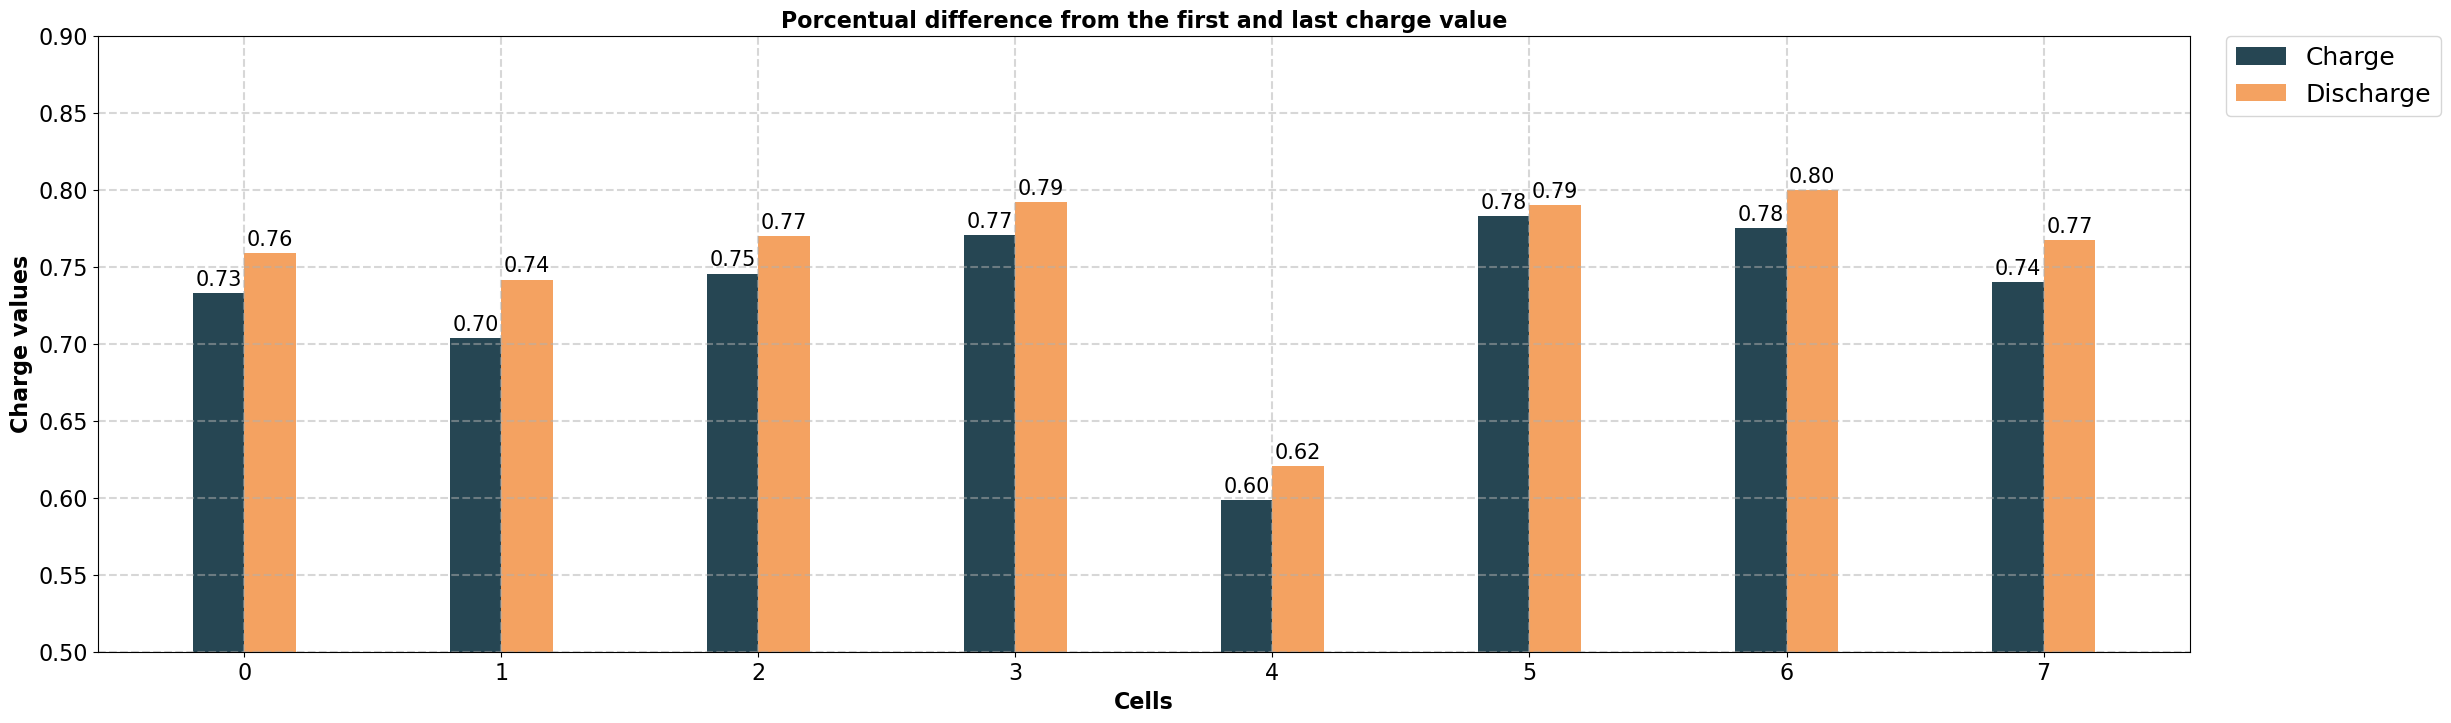

In [12]:
q_charge_differences, q_discarge_differences = begin_end_percent_difference('q',0), begin_end_percent_difference('q',1)
plotting_results(cells, q_charge_differences, q_discarge_differences, [0.5, 0.9])

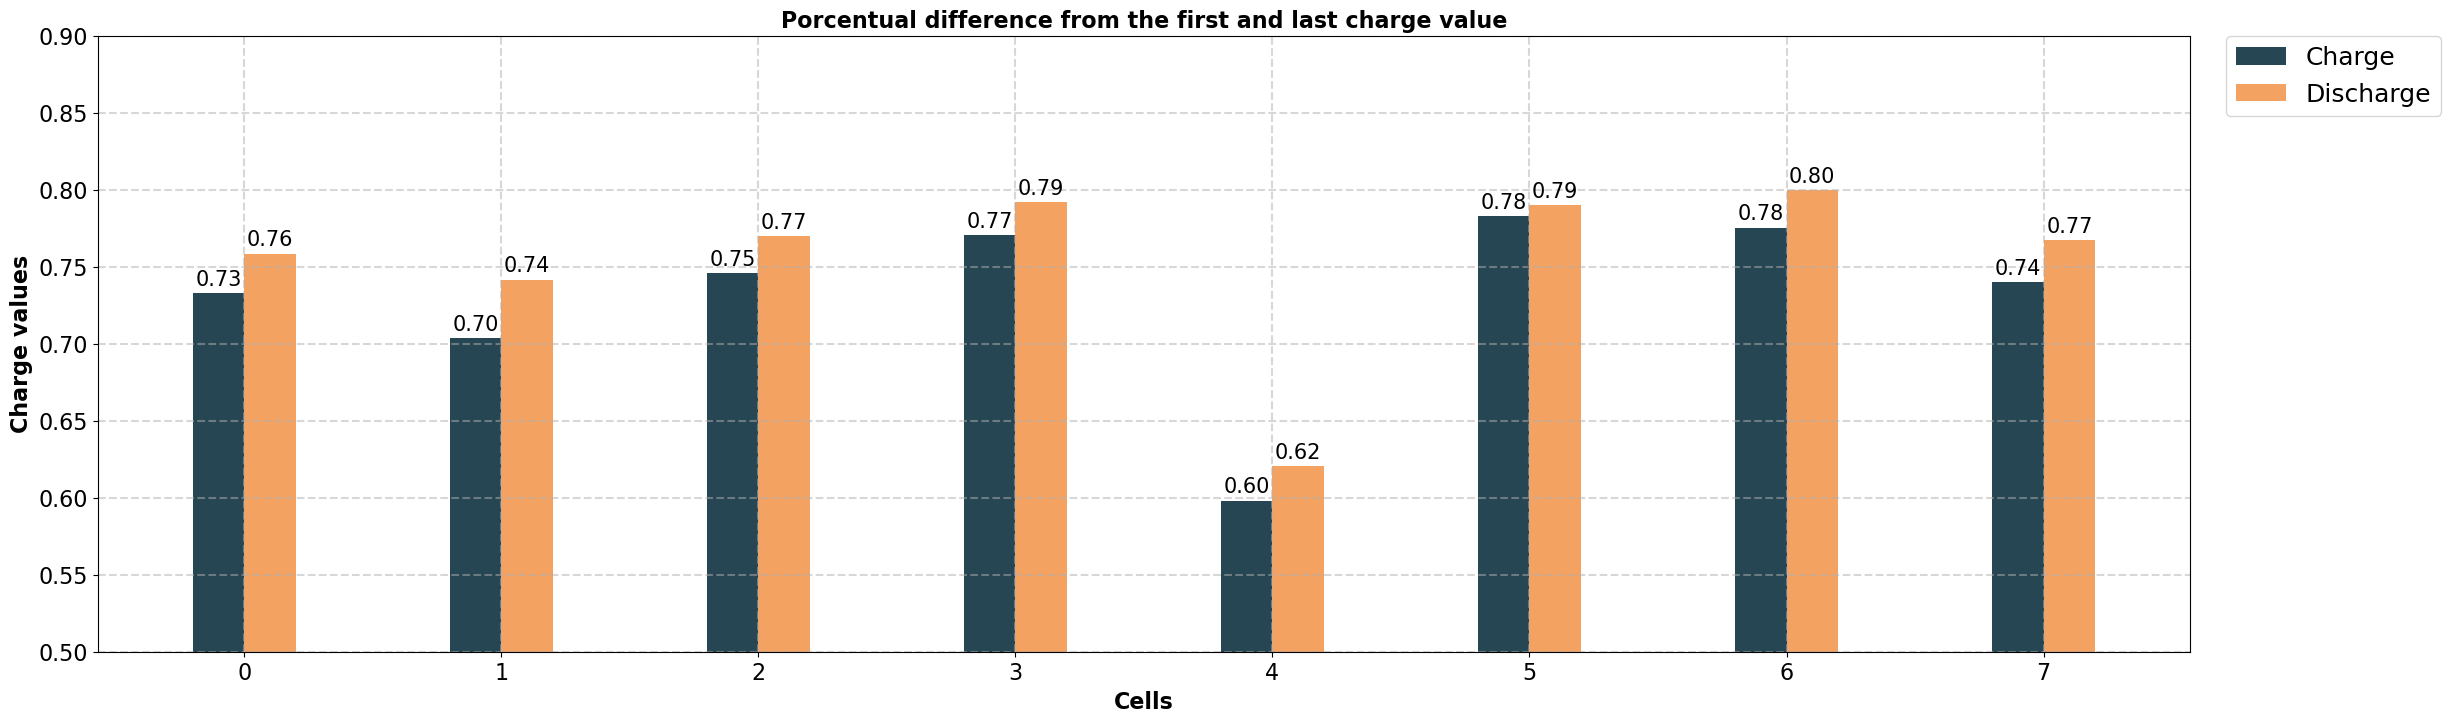

In [13]:
q_charge_differences, q_discarge_differences = begin_end_percent_without_difference('q',0), begin_end_percent_without_difference('q',1)
plotting_results(cells, q_charge_differences, q_discarge_differences, [0.5, 0.9])

#### **Plots 4 - Charge values evolution in charge and discarge process for the first battery**

In [14]:
df_list_charge, df_list_discharge = csv_selector(csvv = 0, batery = 1), csv_selector(csvv = 1, batery = 1)
time_diference_charge, time_diference_discharge = [x.t[len(x)-1] - x.t[0] for x in df_list_charge], [x.t[len(x)-1] - x.t[0] for x in df_list_discharge]

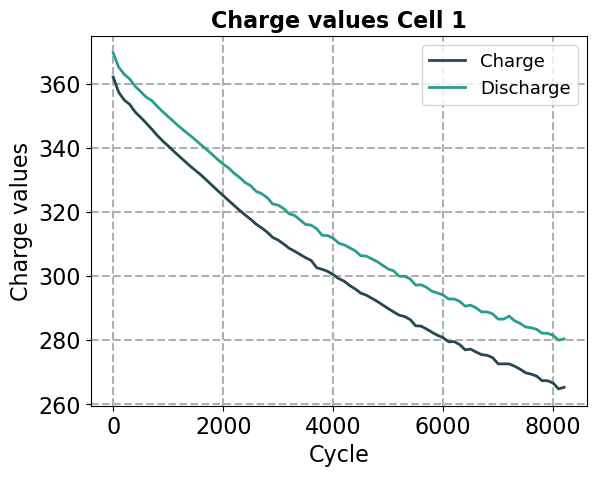

In [15]:
q_values, q_disvalues = [x.q.mean() for x in df_list_charge], [x.q.mean() for x in df_list_discharge]
cycle_value = sorted(list(rutes(batery = 1)[0].values()))

plt.plot(cycle_value,q_values, linewidth=2, color=palette[0], label='Charge')
plt.plot(cycle_value,np.abs(q_disvalues), linewidth=2, color=palette[1], label='Discharge')
plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5), plt.legend(fontsize=13);
plt.xlabel('Cycle', fontsize=16), plt.ylabel('Charge values', fontsize=16),  plt.title(f'Charge values Cell 1', fontdict=font);

#### **Plots 5 - Time difference between the first and last value by cycle**

In [16]:
modified_palette = palette.copy()
modified_palette.pop(3)

def plotting_time_difference(dff = charge_every_cell, title = 'Charge', legend_num = 1):
    for k, i in enumerate(dff):
        time_diference_charge = [x.t[len(x)-1] - x.t[0] for x in i]
        cycle_value = sorted(list(rutes(batery = k+1)[0].values()))
        plt.plot(cycle_value, time_diference_charge, label=f"{title} cell {k+1}", linewidth=2, color=modified_palette[k])
    plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5);
    plt.xlabel('Cycle', fontsize = 16), plt.ylabel('Tine difference', fontsize = 16),  plt.title(f'Time difference between the first and last value by cycle', fontdict=font);
    plt.legend(fontsize=10);

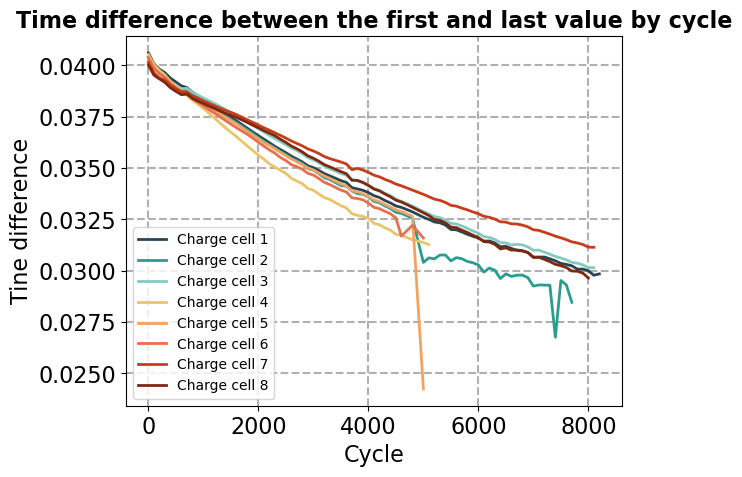

In [17]:
plotting_time_difference(charge_every_cell, 'Charge', 1.55)

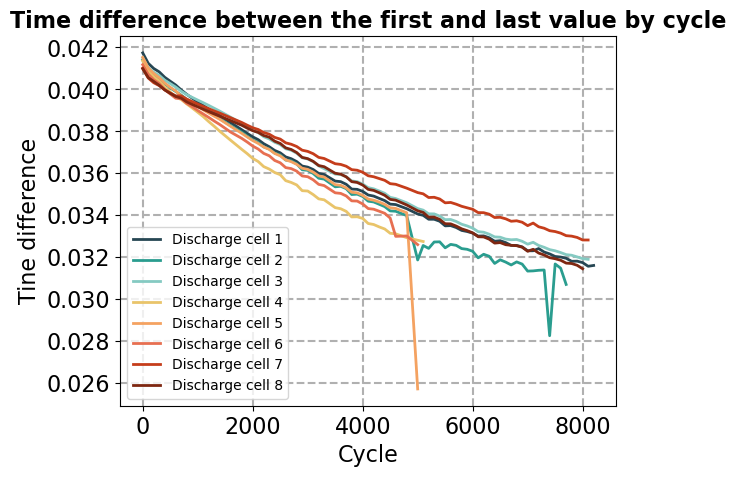

In [18]:
plotting_time_difference(discharge_every_cell, 'Discharge', 1.62)

### <a id='3'>3. Preprocessing</a>
---

Generation of features per cell and cycle

In [19]:
df_full = pd.DataFrame(columns=['cell','cycle','type','t','v','q','T','SoH'])

for r in elements:
    
    path = path_origin + f'/{r}'
    dirs = sorted(os.listdir(path), key=lambda x: float(x[3:]))
    
    for i in dirs:
        df_partial = pd.DataFrame(columns=['cell','cycle','type','t','v','q','T','SoH'])
        path2 = path+'/'+i
        archives = [archive for archive in os.listdir(path2) if 'V' not in archive]
        cyc_discharge = pd.read_csv(path2 + f'/{archives[0]}')
        cyc_charge = pd.read_csv(path2 + f'/{archives[1]}')
        types, types_str = [cyc_discharge,cyc_charge], ['dc','ch']
        
        for j in range(len(types)):
            df_partial['t'], df_partial['v'], df_partial['q'], df_partial['T'], df_partial['SoH'] = types[j]['t'], types[j]['v'], types[j]['q'], types[j]['T'], types[j]['SoH']
            df_partial['cell'], df_partial['cycle'], df_partial['type'] = r[4:], i[3:], types_str[j]
            df_full = df_full.append(df_partial, ignore_index=True)

Extract **characteristics** per cell, cycle and type:

In [20]:
df_desc = pd.pivot_table(df_full, values=['t','v','q','T','SoH'], index=['cell','cycle','type'], aggfunc={'t':['max','min'], 'v':['max','min','mean','std', skew, kurtosis],
                                                               'q':['max','min','mean','std', skew, kurtosis],'T':['max','min','mean','std', skew, kurtosis],'SoH':'max'})

df_desc.columns = [i[0]+'_'+i[1] for i in df_desc.columns]
df_desc['t_total'] = df_desc['t_max'] - df_desc['t_min']
df_desc.drop(columns=['t_max','t_min'], inplace=True)

**Combine** charge and discharge features into one row per cell and cycle.

In [21]:
df_desc_final = pd.DataFrame(columns = ['cell','cycle'] + [col + '_ch' for col in list(df_desc.columns)] + [col + '_dc' for col in list(df_desc.columns)])
for ind in range(len(df_desc.index)):
    if ind % 2 == 0:
        values = list(df_desc.loc[df_desc.index[ind],:]) + list(df_desc.loc[df_desc.index[ind+1],:])
        df_desc_final.loc[ind//2,:] = [df_desc.index[ind][0],df_desc.index[ind][1]] + values

Final dataframe

In [22]:
df_desc_final = df_desc_final.apply(pd.to_numeric, errors='coerce')
df_desc_final.sort_values(by=['cell','cycle'], inplace=True)
df_desc_final.set_index(['cell','cycle'], inplace=True)
df_desc_final.head()

SoH_max_ch  T_kurtosis_ch   T_max_ch  T_mean_ch   T_min_ch  \
cell cycle                                                               
1    0      100.000000      -1.083936  41.174809  40.407376  39.901646   
     100     98.676209      -1.188189  41.124866  40.314679  39.801758   
     200     98.029812      -1.184674  41.112400  40.315173  39.814266   
     300     97.641065      -1.179126  41.124866  40.309946  39.789291   
     400     96.977493      -1.168146  41.124866  40.302588  39.789291   

            T_skew_ch  T_std_ch  q_kurtosis_ch  q_max_ch   q_mean_ch  ...  \
cell cycle                                                            ...   
1    0       0.528187  0.344139      -1.200000       0.0 -359.585275  ...   
     100     0.494053  0.370530      -1.200106       0.0 -354.826094  ...   
     200     0.501045  0.362974      -1.200042       0.0 -352.430166  ...   
     300     0.524198  0.372747      -1.200020       0.0 -350.954383  ...   
     400     0.521274  0.371967      -1.200076       0.0 -348.658258  ...   

            q_min_dc  q_skew_dc    q_std_dc  v_kurtosis_dc  v_max_dc  \
cell cycle                                                             
1    0     -0.000049  -0.000008  209.148607       1.668740  4.199977   
     100   -0.000049  -0.000120  206.407459       1.661299  4.200017   
     200   -0.000049  -0.000030  205.020342       1.691731  4.199897   
     300   -0.000049   0.000029  204.241309       1.733821  4.199801   
     400   -0.000049  -0.000063  202.847183       1.764507  4.199881   

            v_mean_dc  v_min_dc  v_skew_dc  v_std_dc  t_total_dc  
cell cycle                                                        
1    0       3.819664  2.719213  -0.969205  0.221073    0.040610  
     100     3.821715  2.719614  -0.961001  0.219879    0.040073  
     200     3.822391  2.719775  -0.968342  0.219837    0.039813  
     300     3.822893  2.720641  -0.982355  0.220404    0.039645  
     400     3.823835  2.720881  -0.987536  0.219984    0.039380  

[5 rows x 40 columns]

RUL calculation

In [23]:
eol, percentage_diff = dict(), dict()
for bateria in df_desc_final.index.get_level_values(0).unique().tolist():
    df_part = df_desc_final.loc[bateria,:]
    for ciclo in range(len(df_part)):
        if df_part.iloc[ciclo, 0] < 80:
            eol[bateria] = df_part.index.to_list()[ciclo]
            percentage_diff[bateria] = df_part.iloc[ciclo, 0]
            break

df_desc_final['RUL'] = df_desc_final.index.get_level_values(0).astype(int).map(eol)
df_desc_final['RUL'] = df_desc_final['RUL'] - df_desc_final.index.get_level_values(1).astype(int)

Soh plot

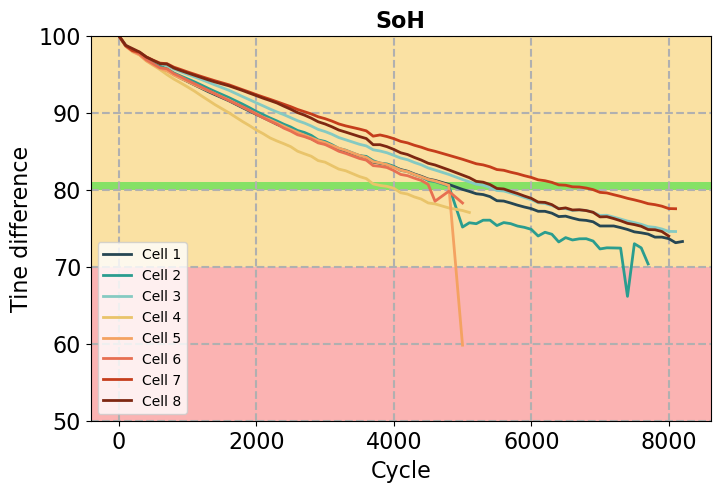

In [47]:
fig = plt.figure(figsize=(8, 5))
for x in range(1, 9):
    cycles, values = df_desc_final[df_desc_final.index.get_level_values(0) == x]['SoH_max_ch'].index.get_level_values(1).tolist(), df_desc_final[df_desc_final.index.get_level_values(0) == x]['SoH_max_ch'].values
    plt.plot(cycles, values, label=f"Cell {x}", linewidth=2, color=modified_palette[x-1])
plt.xticks(fontsize=16), plt.yticks(fontsize=16), plt.grid(linestyle='--',linewidth=1.5);
plt.xlabel('Cycle', fontsize = 16), plt.ylabel('Tine difference', fontsize = 16),  plt.title(f'SoH', fontdict=font), plt.legend(fontsize=10);
plt.ylim(50, 100);
plt.axhspan(70, 50, facecolor='#f50400', alpha=0.3), plt.axhspan(80, 70, facecolor='#f4b41a', alpha=0.4), \
                                                                   plt.axhspan(81, 80, facecolor='#68da3e', alpha=0.8), plt.axhspan(81, 100, facecolor='#f4b41a', alpha=0.4);

### <a id='5'>5. save data</a>
---

In [24]:
df_desc_final.to_pickle('../data/processed_data/df_desc_final.pkl')